In [1]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

C:\David\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# def a function to create a nn layer
def add_layer(inputs, n_features, l_units, activation = None): # we set the default activation as none
    W = tf.Variable(tf.random_normal([n_features, l_units]))
    bias = tf.Variable(tf.ones([1,l_units])/5)
    Wx_plus_bias = tf.matmul(inputs, W) + bias # not that the matrix is m by l, which means m data and l units at the layer
    if activation is None:
        return Wx_plus_bias # a linear response returned
    else:
        return activation(Wx_plus_bias)

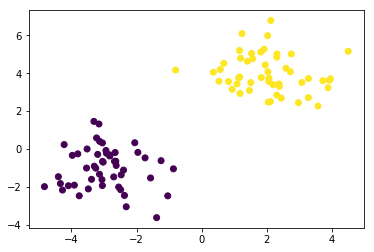

In [3]:
# create two groups of data by make_blobs
X, Y = make_blobs(centers=[[-3,-1],[2,4]], n_samples= 100, n_features=2, random_state= 87)
X = X.astype(np.float32)
Y = Y.reshape(-1,1).astype(np.float32)

plt.scatter(X[:,0],X[:,1] ,c = Y.ravel())
plt.show()

At step 1
the loss = 0.05730244889855385
---------------------------------
At step 21
the loss = 0.0060742879286408424
---------------------------------
At step 41
the loss = 0.003097120439633727
---------------------------------
At step 61
the loss = 0.0021234657615423203
---------------------------------
At step 81
the loss = 0.0016333728563040495
---------------------------------
At step 101
the loss = 0.0013327402994036674
---------------------------------
At step 121
the loss = 0.0011286856606602669
---------------------------------
At step 141
the loss = 0.0009807009482756257
---------------------------------
At step 161
the loss = 0.0008682499174028635
---------------------------------
At step 181
the loss = 0.000779757450800389
---------------------------------
At step 201
the loss = 0.0007082315278239548
---------------------------------


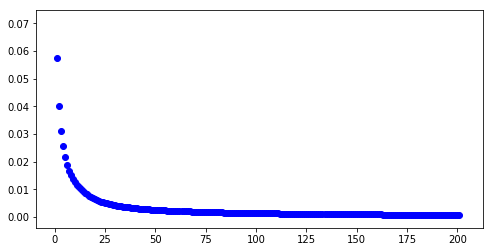

In [6]:
X_input = tf.placeholder(tf.float32, [None,2]) # [None, 2] means None by 2 matrix
target = tf.placeholder(tf.float32, [None,1]) # [None, 2] means None by 1 matrix

hidden = add_layer(X_input, 2, 10, activation=tf.nn.relu) #first hidden layer has 10 units 
output = add_layer(hidden, 10, 1, activation=tf.nn.sigmoid) # one unit output

loss = tf.reduce_mean(tf.reduce_sum(tf.square(target - output)))

optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

fig = plt.figure(figsize=(8,4))
for i in range(201):
    sess.run(optimizer, feed_dict = {X_input : X, target: Y})
    loss_val = sess.run(loss, feed_dict = {X_input : X, target: Y})
    plt.scatter((i+1), loss_val, c = 'b')
    if i % 20 == 0:
        print("At step %d" % (i+1) )
        print("the loss = {}".format(loss_val))
        print("---------------------------------")
        
plt.show()

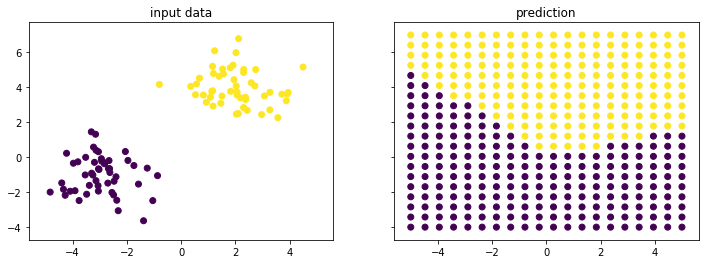

In [17]:
# now we start to visualize our predicted result
X_grid, Y_grid = np.meshgrid(np.linspace(-5,5,20),np.linspace(-4,7,20))

X_test = np.c_[X_grid.ravel(), Y_grid.ravel()]

predict_prob = sess.run(output, feed_dict={X_input:X_test})
# note that we need to map prob to class for visualizing purpose
predict_class = np.array([1 if (prob > 0.5) else 0 for prob in predict_prob]).astype(np.int32)

fig, axes = plt.subplots(1,2, sharex='all', sharey='all')
fig.set_figheight(4), fig.set_figwidth(12)

for i, XX, YY, title in zip(range(2),[X, X_test],[Y,predict_class],['input data', 'prediction']):
    axes[i].scatter(XX[:,0],XX[:,1] ,c = YY.ravel())
    axes[i].set_title(title)

plt.show()